In [1]:
import polars as pl
import pandas as pd
import preprocessing.feature_engineering as fe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_selected = pl.read_parquet("./data/2022_data_selected.parquet")

In [3]:
df_failure = df_selected.filter(pl.col("failure") == 1)

In [4]:
df_failure

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-03-11""","""71A0A2NWFVGG""","""TOSHIBA MG08AC...",16000900661248,1,100,0,100,8070,100,22,100,0,100,0,93,2960,100,0,100,22,null,null,null,null,100,21,100,1070,100,31,100,1091,100,0,200,0
"""2022-03-11""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,1,78,58136744,89,0,100,19,73,44320,78,66557216,76,21676,100,0,100,19,1,233,100,0,100,288,100,1590,34,34,100,0,100,0,200,0
"""2022-03-11""","""ZHZ63CSQ""","""ST12000NM0008""",12000138625024,1,83,213282896,93,0,100,6,97,7272,88,589048613,80,17927,100,0,100,5,50,50,100,0,100,1,99,2743,28,28,100,24,100,24,200,0
"""2022-03-11""","""Z302CYGC""","""ST4000DM000""",4000787030016,1,117,167391432,92,0,100,15,100,0,87,477518379,37,55793,100,0,100,15,100,0,100,0,100,2,96,8628,22,22,100,0,100,0,200,0
"""2022-03-11""","""ZA180XHR""","""ST8000NM0055""",8001563222016,1,79,75517896,89,0,100,20,89,43456,93,1836902583,54,40362,100,0,100,20,54,46,100,0,100,79,89,23961,40,40,100,0,100,0,200,0
"""2022-03-11""","""ZLW0WT2G""","""ST12000NM001G""",12000138625024,1,73,18496656,96,0,100,4,100,16,84,256973842,90,8763,100,0,100,4,100,0,100,0,100,2,100,571,26,26,100,0,100,0,200,0
"""2022-03-11""","""ZHZ3CMBS""","""ST14000NM0138""",14000519643136,1,83,217136352,90,0,100,26,100,0,89,793024464,87,11586,100,0,100,24,100,0,100,0,100,51,98,4266,31,31,100,0,100,0,200,0
"""2022-03-11""","""ZA1JXEFV""","""ST8000NM0055""",8001563222016,1,67,5545842,99,0,100,1,100,0,100,43698,100,0,100,0,100,1,100,0,100,0,100,0,100,2,35,35,100,0,100,0,200,0
"""2022-03-11""","""ZA1814DD""","""ST8000NM0055""",8001563222016,1,79,77378264,89,0,100,12,100,40,92,1741580269,55,39712,100,0,100,12,100,0,100,0,100,65,88,25482,36,36,100,0,100,0,200,0


In [5]:
df_all_modelcounts = df_failure['model'].value_counts()
df_all_modelcounts.sort(by="counts", descending=True)

model,counts
str,u32
"""ST4000DM000""",633
"""ST12000NM0008""",404
"""TOSHIBA MG07AC...",385
"""ST8000NM0055""",348
"""ST8000DM002""",189
"""ST16000NM001G""",142
"""ST14000NM001G""",126
"""ST12000NM001G""",116
"""TOSHIBA MG08AC...",93


In [6]:
df_ST4000DM000 = df_failure.filter((pl.col("model") == "ST4000DM000"))

In [7]:
failed_st4000 = df_ST4000DM000.select(
    [
        
        pl.col("serial_number").unique().alias("serial_number"),
    ])

In [36]:
failed_st4000

serial_number
str
"""Z305D5ZX"""
"""Z304JLGN"""
"""Z302SYA6"""
"""Z305PFZK"""
"""S301PT99"""
"""Z304JMZK"""
"""Z304KA0H"""
"""Z30270EV"""
"""Z302AKZB"""


In [8]:
df_ZJV3BYAY = df_selected.filter(pl.col("serial_number")=="ZJV3BYAY")

In [9]:
df_sorted1 = df_ZJV3BYAY.sort(by='date')

smart statistics for hard drive with serial number ZJV3BYAY

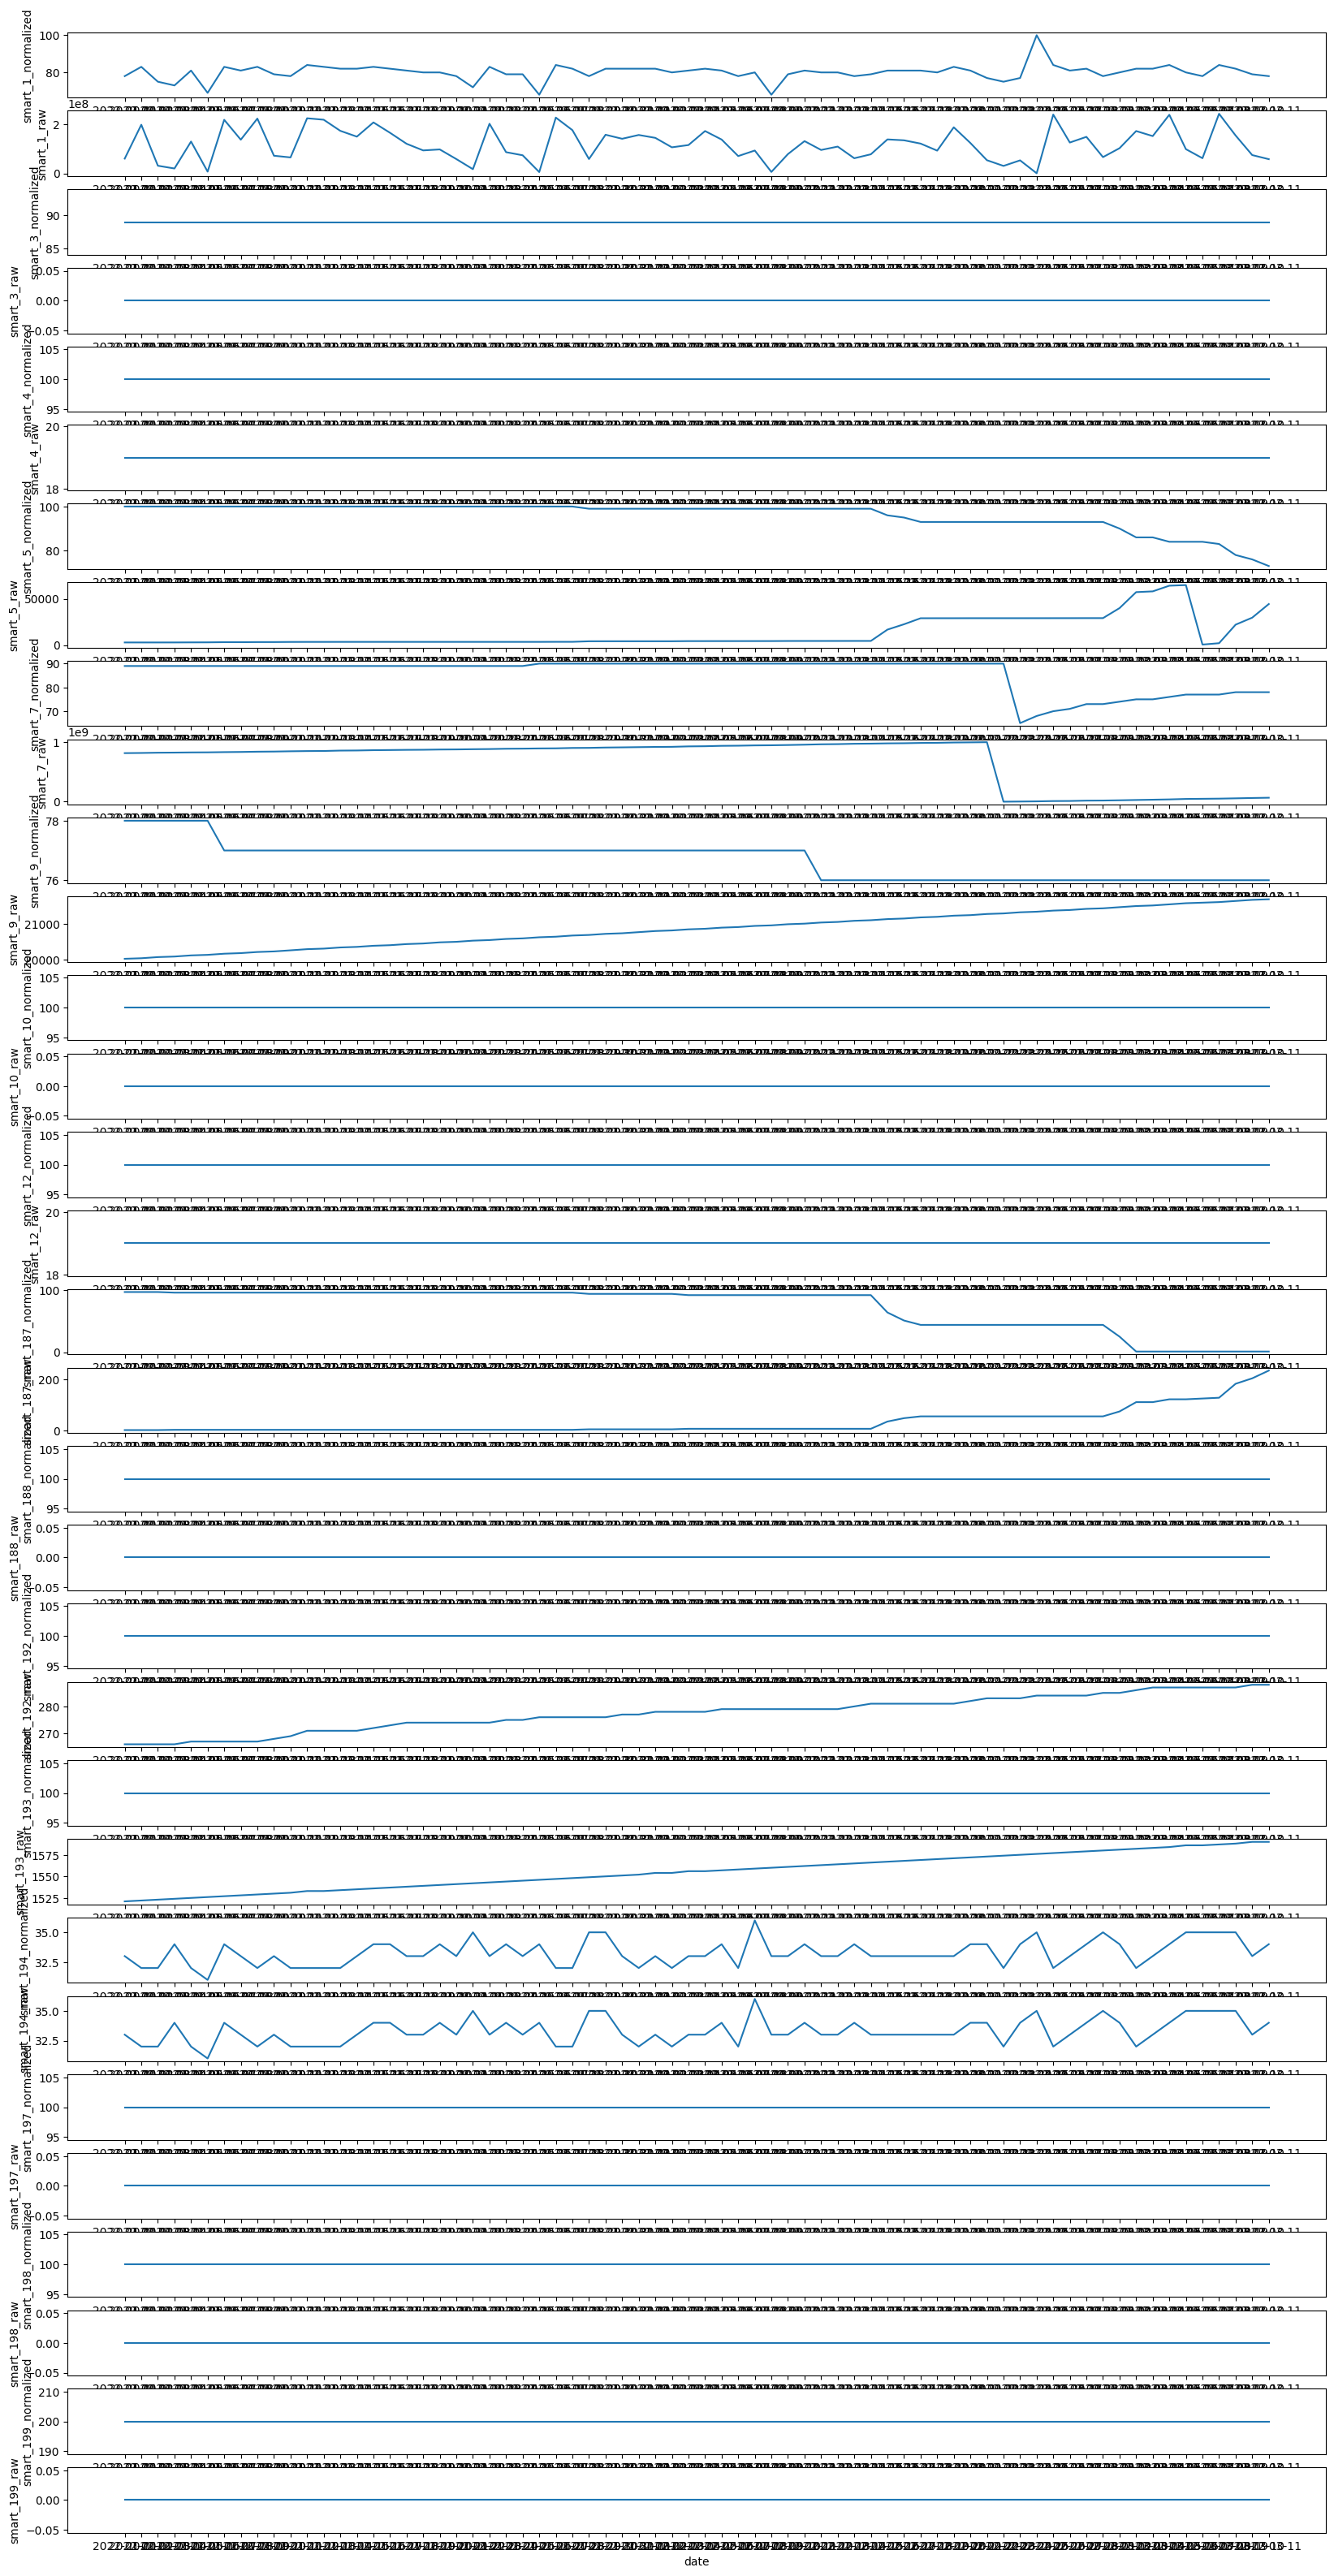

In [10]:
fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted1, x='date', y=df_sorted1.columns[i+5], ax=ax[i])

plt.savefig("./images/ZJV3BYAY.png")

In [11]:
df_S3010LL5 = df_selected.filter(pl.col("serial_number")=="S3010LL5")
df_sorted2 = df_S3010LL5.sort(by='date')



smart statistics for hard drive with serial number S3010LL5


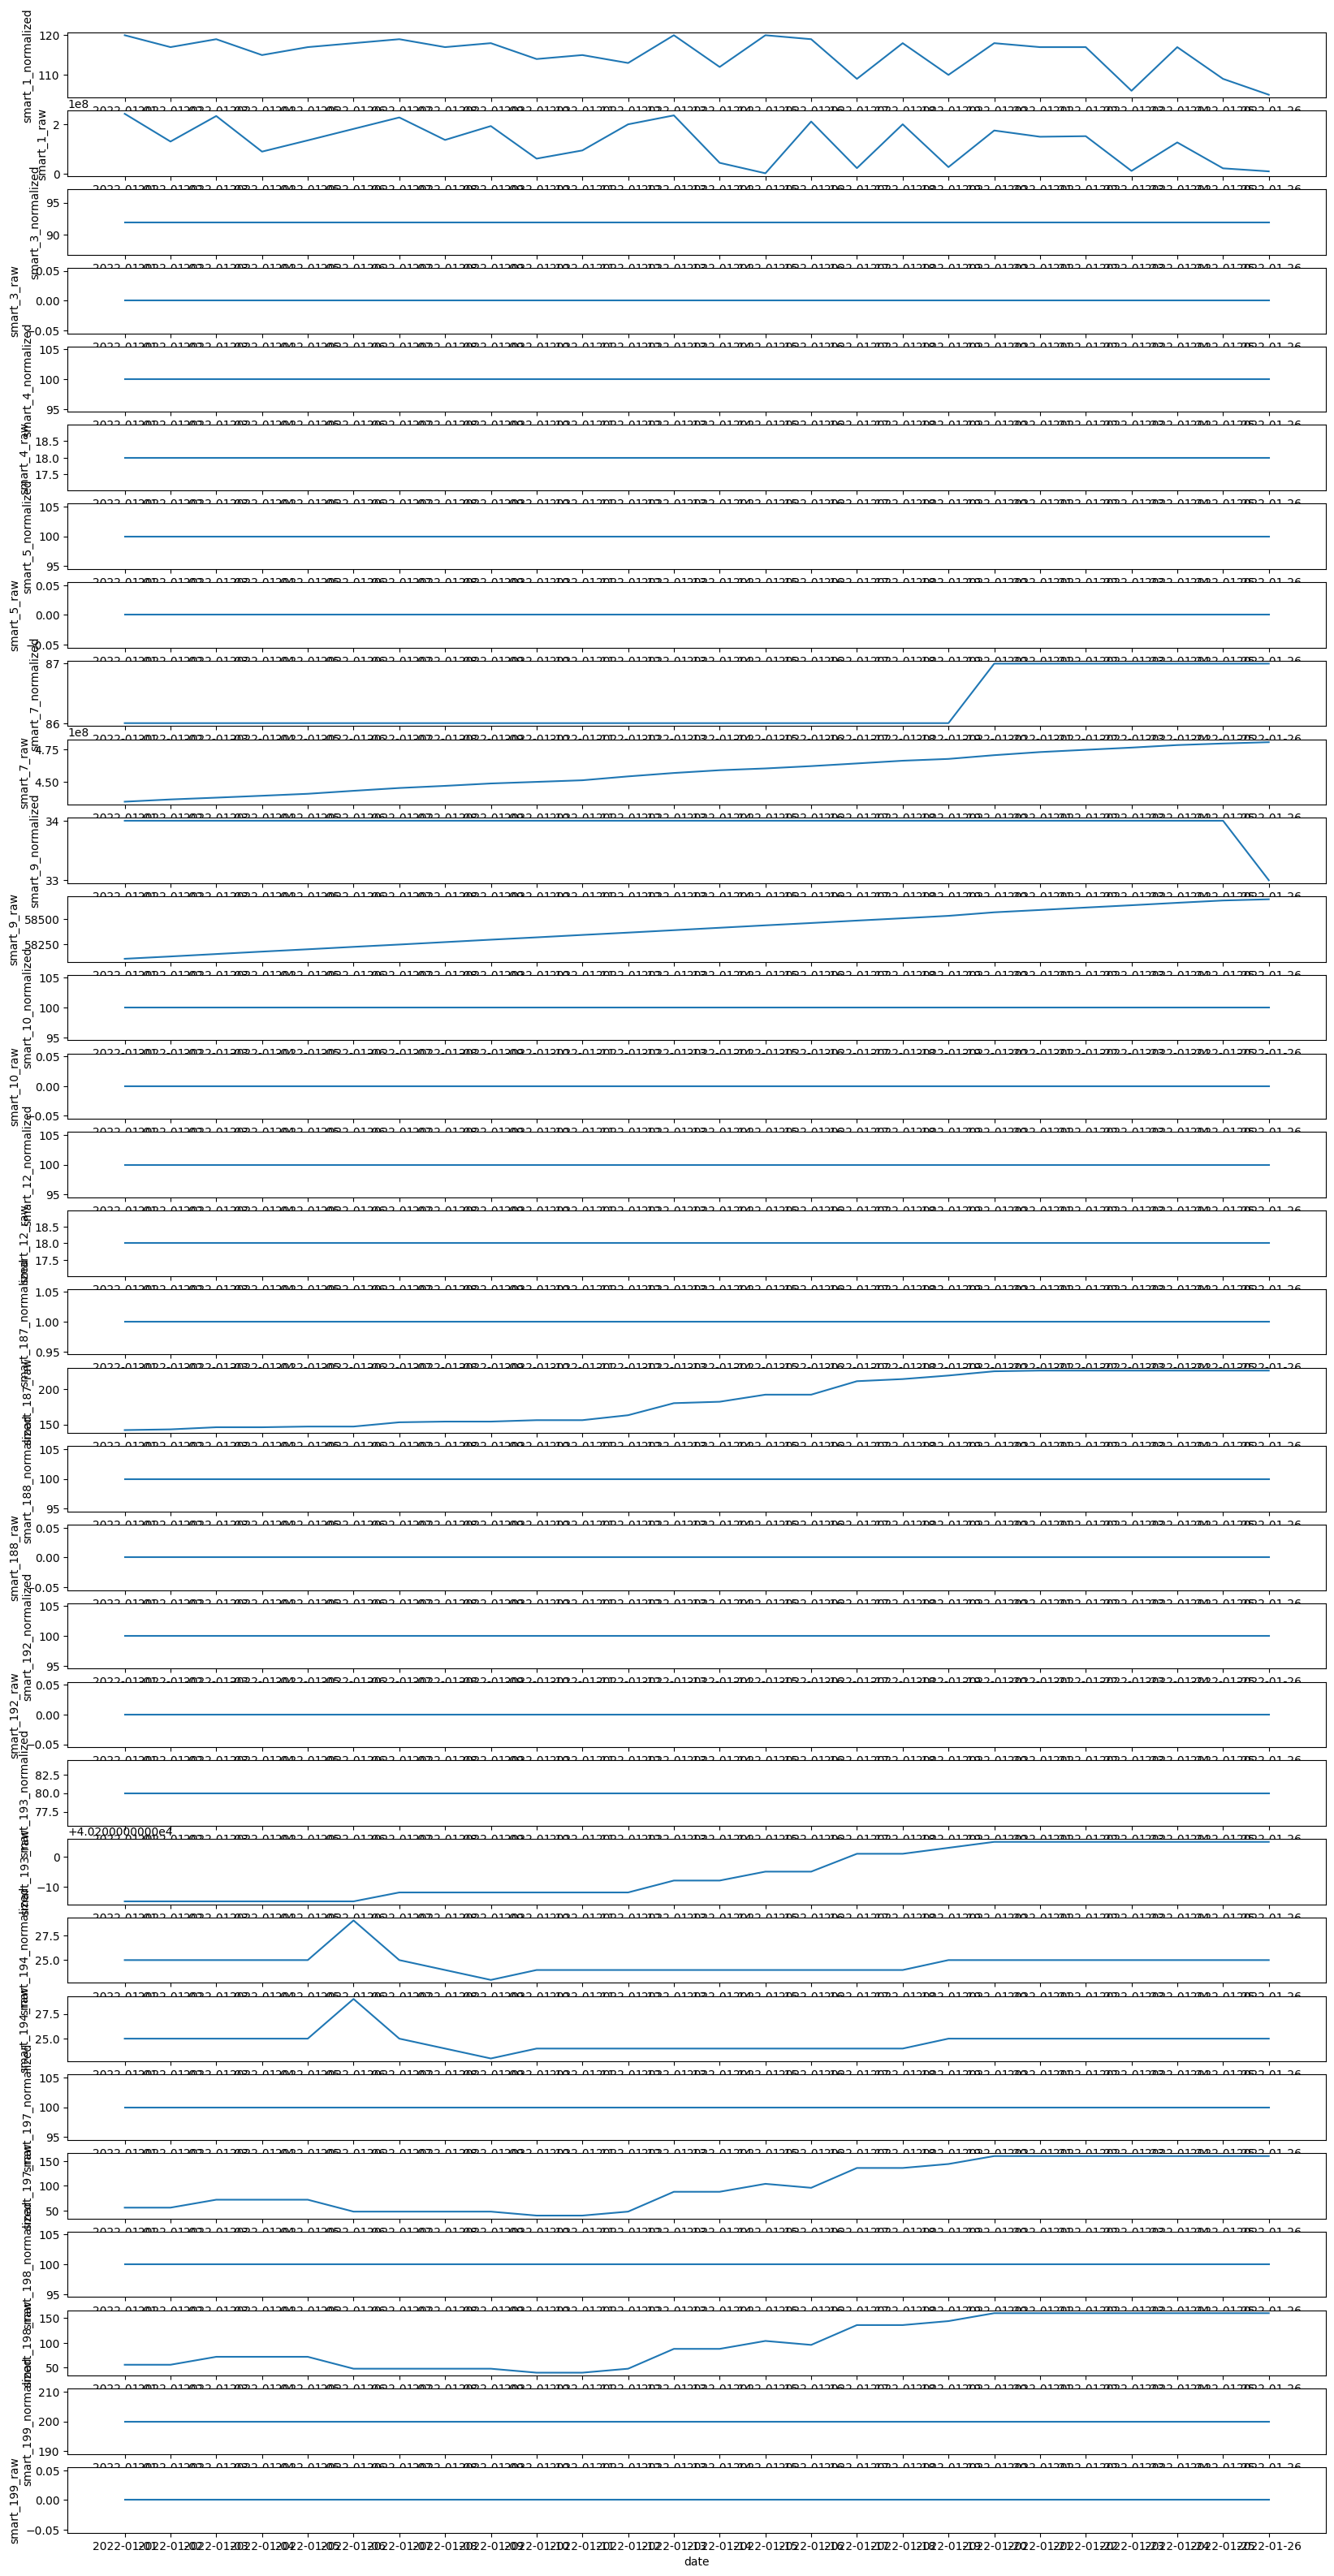

In [12]:
fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted2, x='date', y=df_sorted2.columns[i+5], ax=ax[i])

plt.savefig("./images/S3010LL5.png")

* drop normalized values
* base model (from backblaze): 
    if smart 5 > 0 OR smart 187 > 0 OR smart 188 > 0 OR smart 197 > 0 OR smart 198 >0:
        hard drive fails
    else: not failing

In [13]:
list(failed_st4000)[0][:]

serial_number
str
"""Z305D5ZX"""
"""Z304JLGN"""
"""Z302SYA6"""
"""Z305PFZK"""
"""S301PT99"""
"""Z304JMZK"""
"""Z304KA0H"""
"""Z30270EV"""
"""Z302AKZB"""


In [14]:
failed_st4000_list = failed_st4000.to_series().to_list()

In [15]:
#hard drive model ST4000DM000 thats not failed: hard drives that failed failed_st4000
df_nofailure = df_selected.filter((pl.col("model") == "ST4000DM000") & ~ pl.col("serial_number").is_in(failed_st4000_list))

In [16]:
df_nofailure

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-03-11""","""Z305DEMX""","""ST4000DM000""",4000787030016,0,114,61208648,92,0,100,16,100,0,84,274860655,38,54806,100,0,100,15,100,0,100,0,100,1,83,34459,19,19,100,0,100,0,200,0
"""2022-03-11""","""S301NGZV""","""ST4000DM000""",4000787030016,0,117,145639880,91,0,100,19,100,0,84,302259307,37,55790,100,0,100,19,100,0,100,0,100,0,92,17578,27,27,100,0,100,0,200,0
"""2022-03-11""","""S3010M7R""","""ST4000DM000""",4000787030016,0,117,140768432,91,0,100,19,100,0,87,610381474,32,59756,100,0,100,19,100,0,100,0,100,0,82,37679,24,24,100,0,100,0,200,0
"""2022-03-11""","""S3010M7H""","""ST4000DM000""",4000787030016,0,117,122568920,91,0,100,26,100,0,84,269858269,33,59457,100,0,100,26,99,1,100,0,100,0,17,166861,24,24,100,0,100,0,200,0
"""2022-03-11""","""S3010M7E""","""ST4000DM000""",4000787030016,0,119,215212568,92,0,100,19,100,0,88,755694637,32,59761,100,0,100,19,100,0,100,0,100,0,81,39310,23,23,100,0,100,0,200,0
"""2022-03-11""","""S300YQM3""","""ST4000DM000""",4000787030016,0,118,180818272,92,0,100,9,100,0,87,493784324,32,59766,100,0,100,9,100,0,100,0,100,0,80,40671,21,21,100,0,100,0,200,0
"""2022-03-11""","""Z305NZM9""","""ST4000DM000""",4000787030016,0,117,146451696,91,0,100,10,100,0,90,982238762,41,52489,100,0,100,10,100,0,100,0,100,1,98,4376,27,27,100,0,100,0,200,0
"""2022-03-11""","""Z305AJF7""","""ST4000DM000""",4000787030016,0,111,32456440,91,0,100,8,100,0,82,193449288,39,53947,100,0,100,8,100,0,100,0,100,0,96,8840,28,28,100,0,100,0,200,0
"""2022-03-11""","""S301NGZ7""","""ST4000DM000""",4000787030016,0,117,167698376,92,0,100,24,100,0,87,483475289,36,56293,100,0,100,24,100,0,100,0,100,0,96,8960,28,28,100,0,100,0,200,0


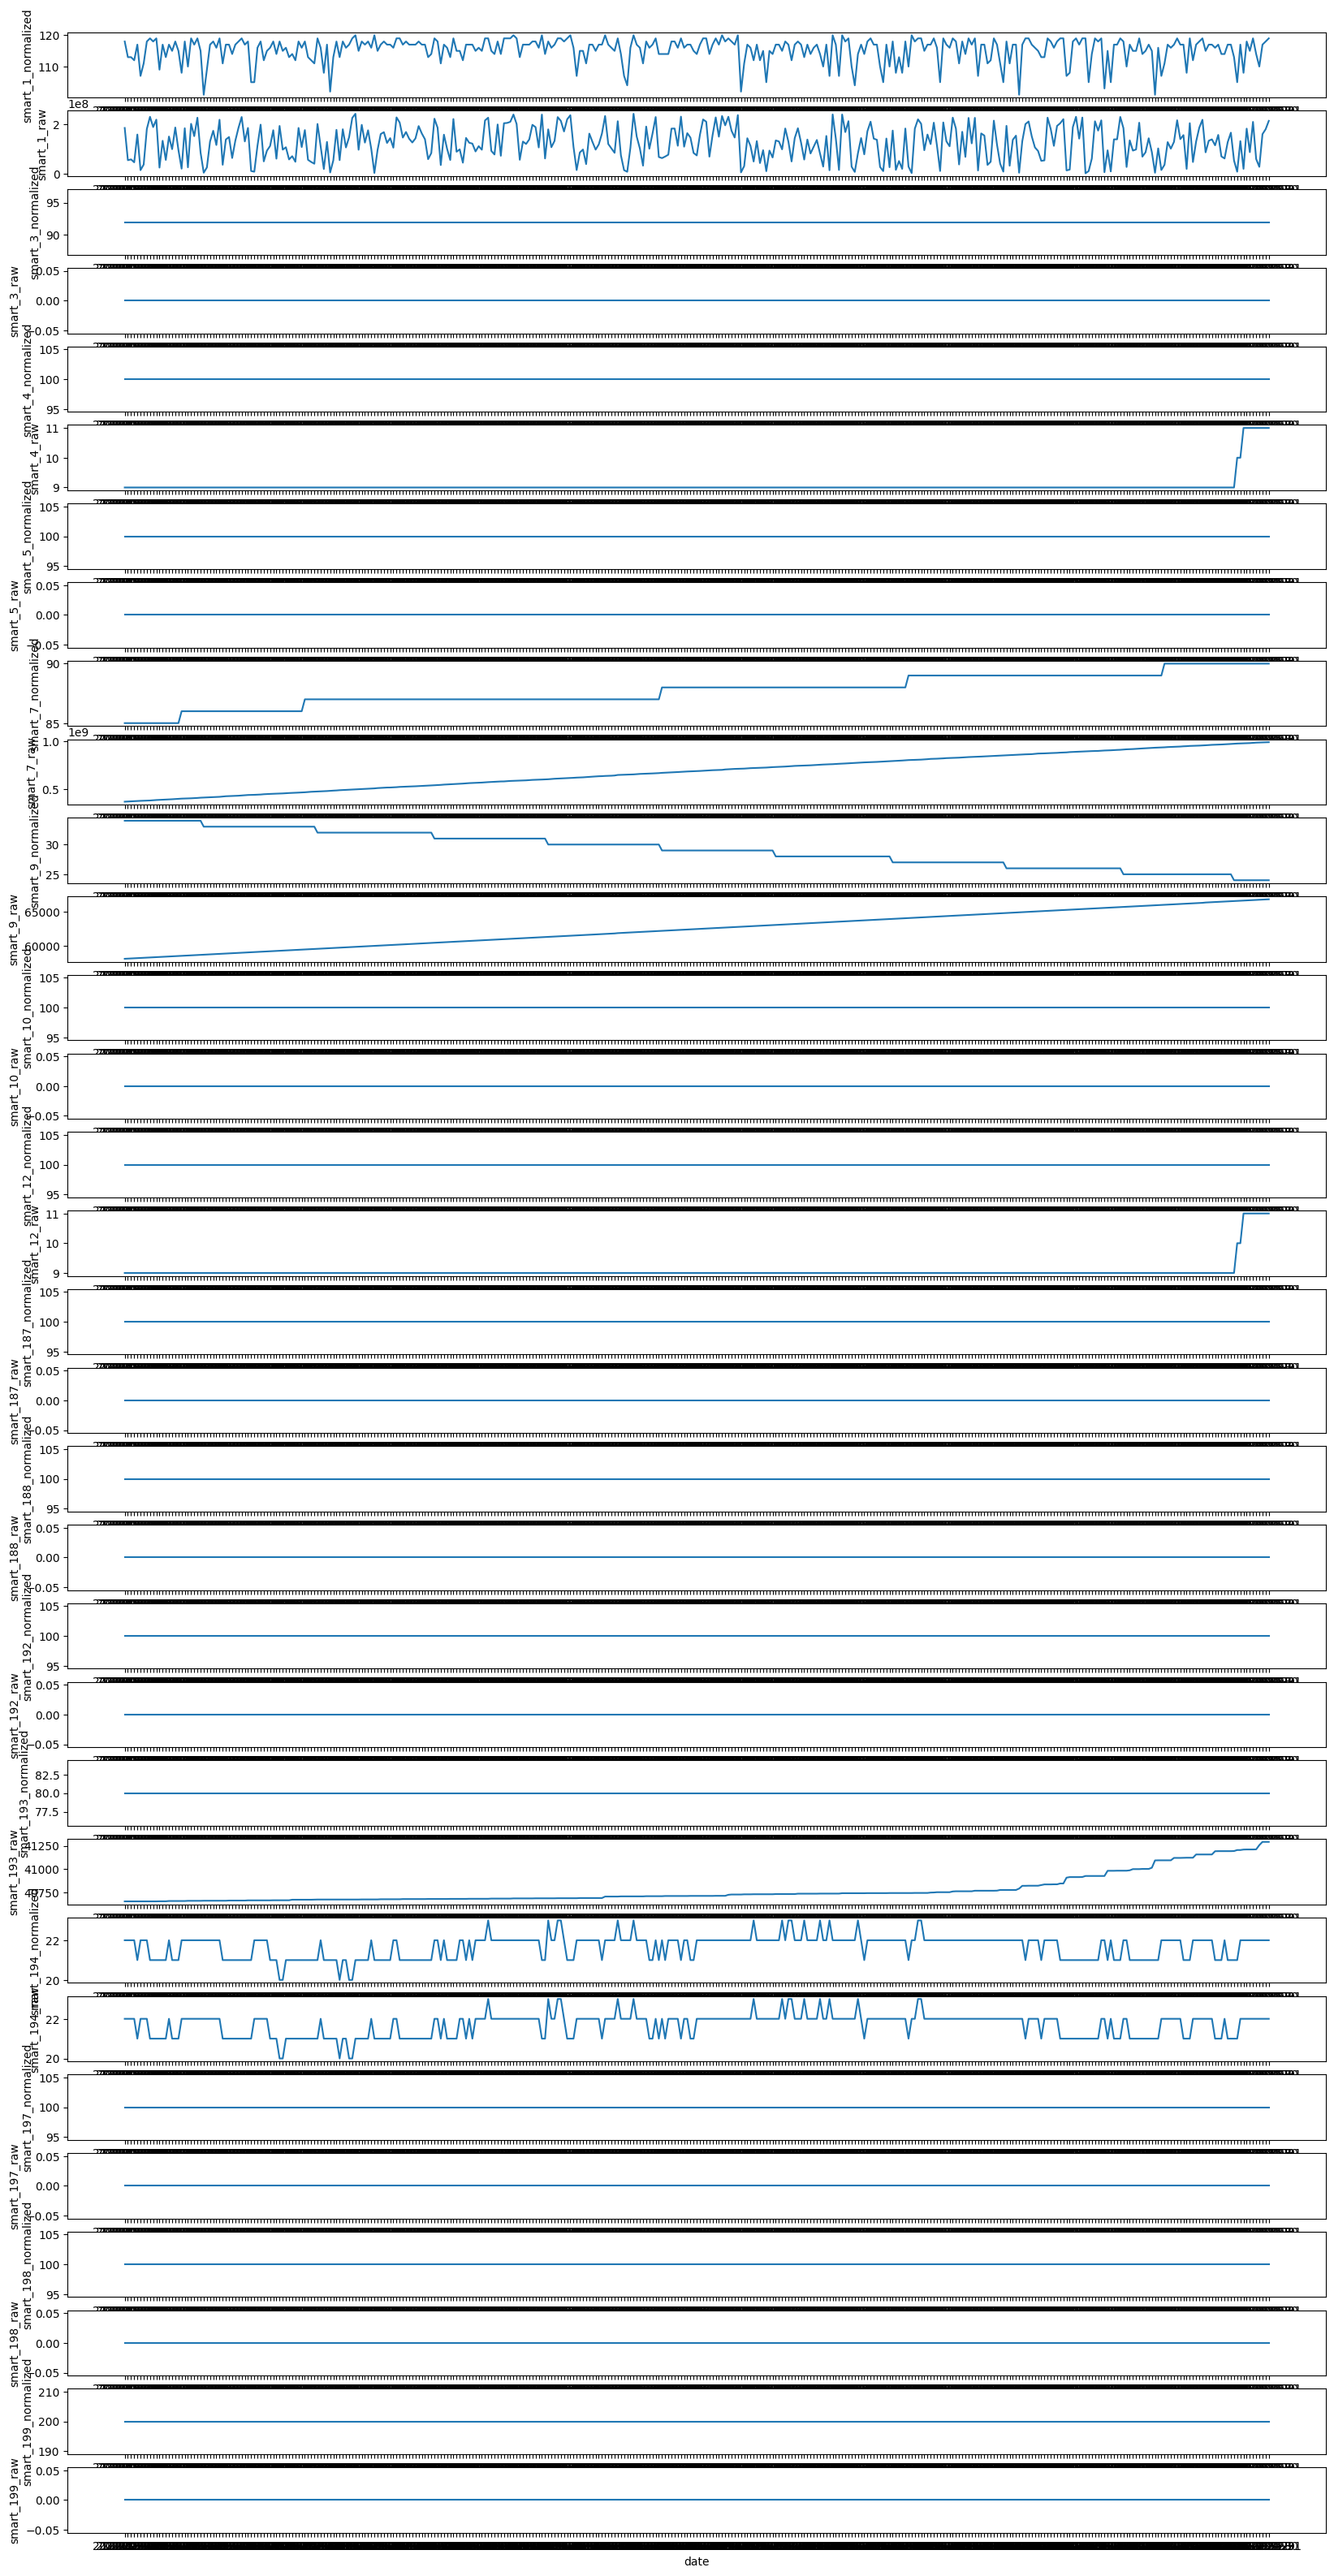

In [17]:
df_S300YQM3 = df_selected.filter(pl.col("serial_number")=="S300YQM3")
df_sorted3 = df_S300YQM3.sort(by='date')


#smart statistics for hard drive with serial number S3010LL5

fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted3, x='date', y=df_sorted3.columns[i+5], ax=ax[i])

plt.savefig("./images/S300YQM3.png")

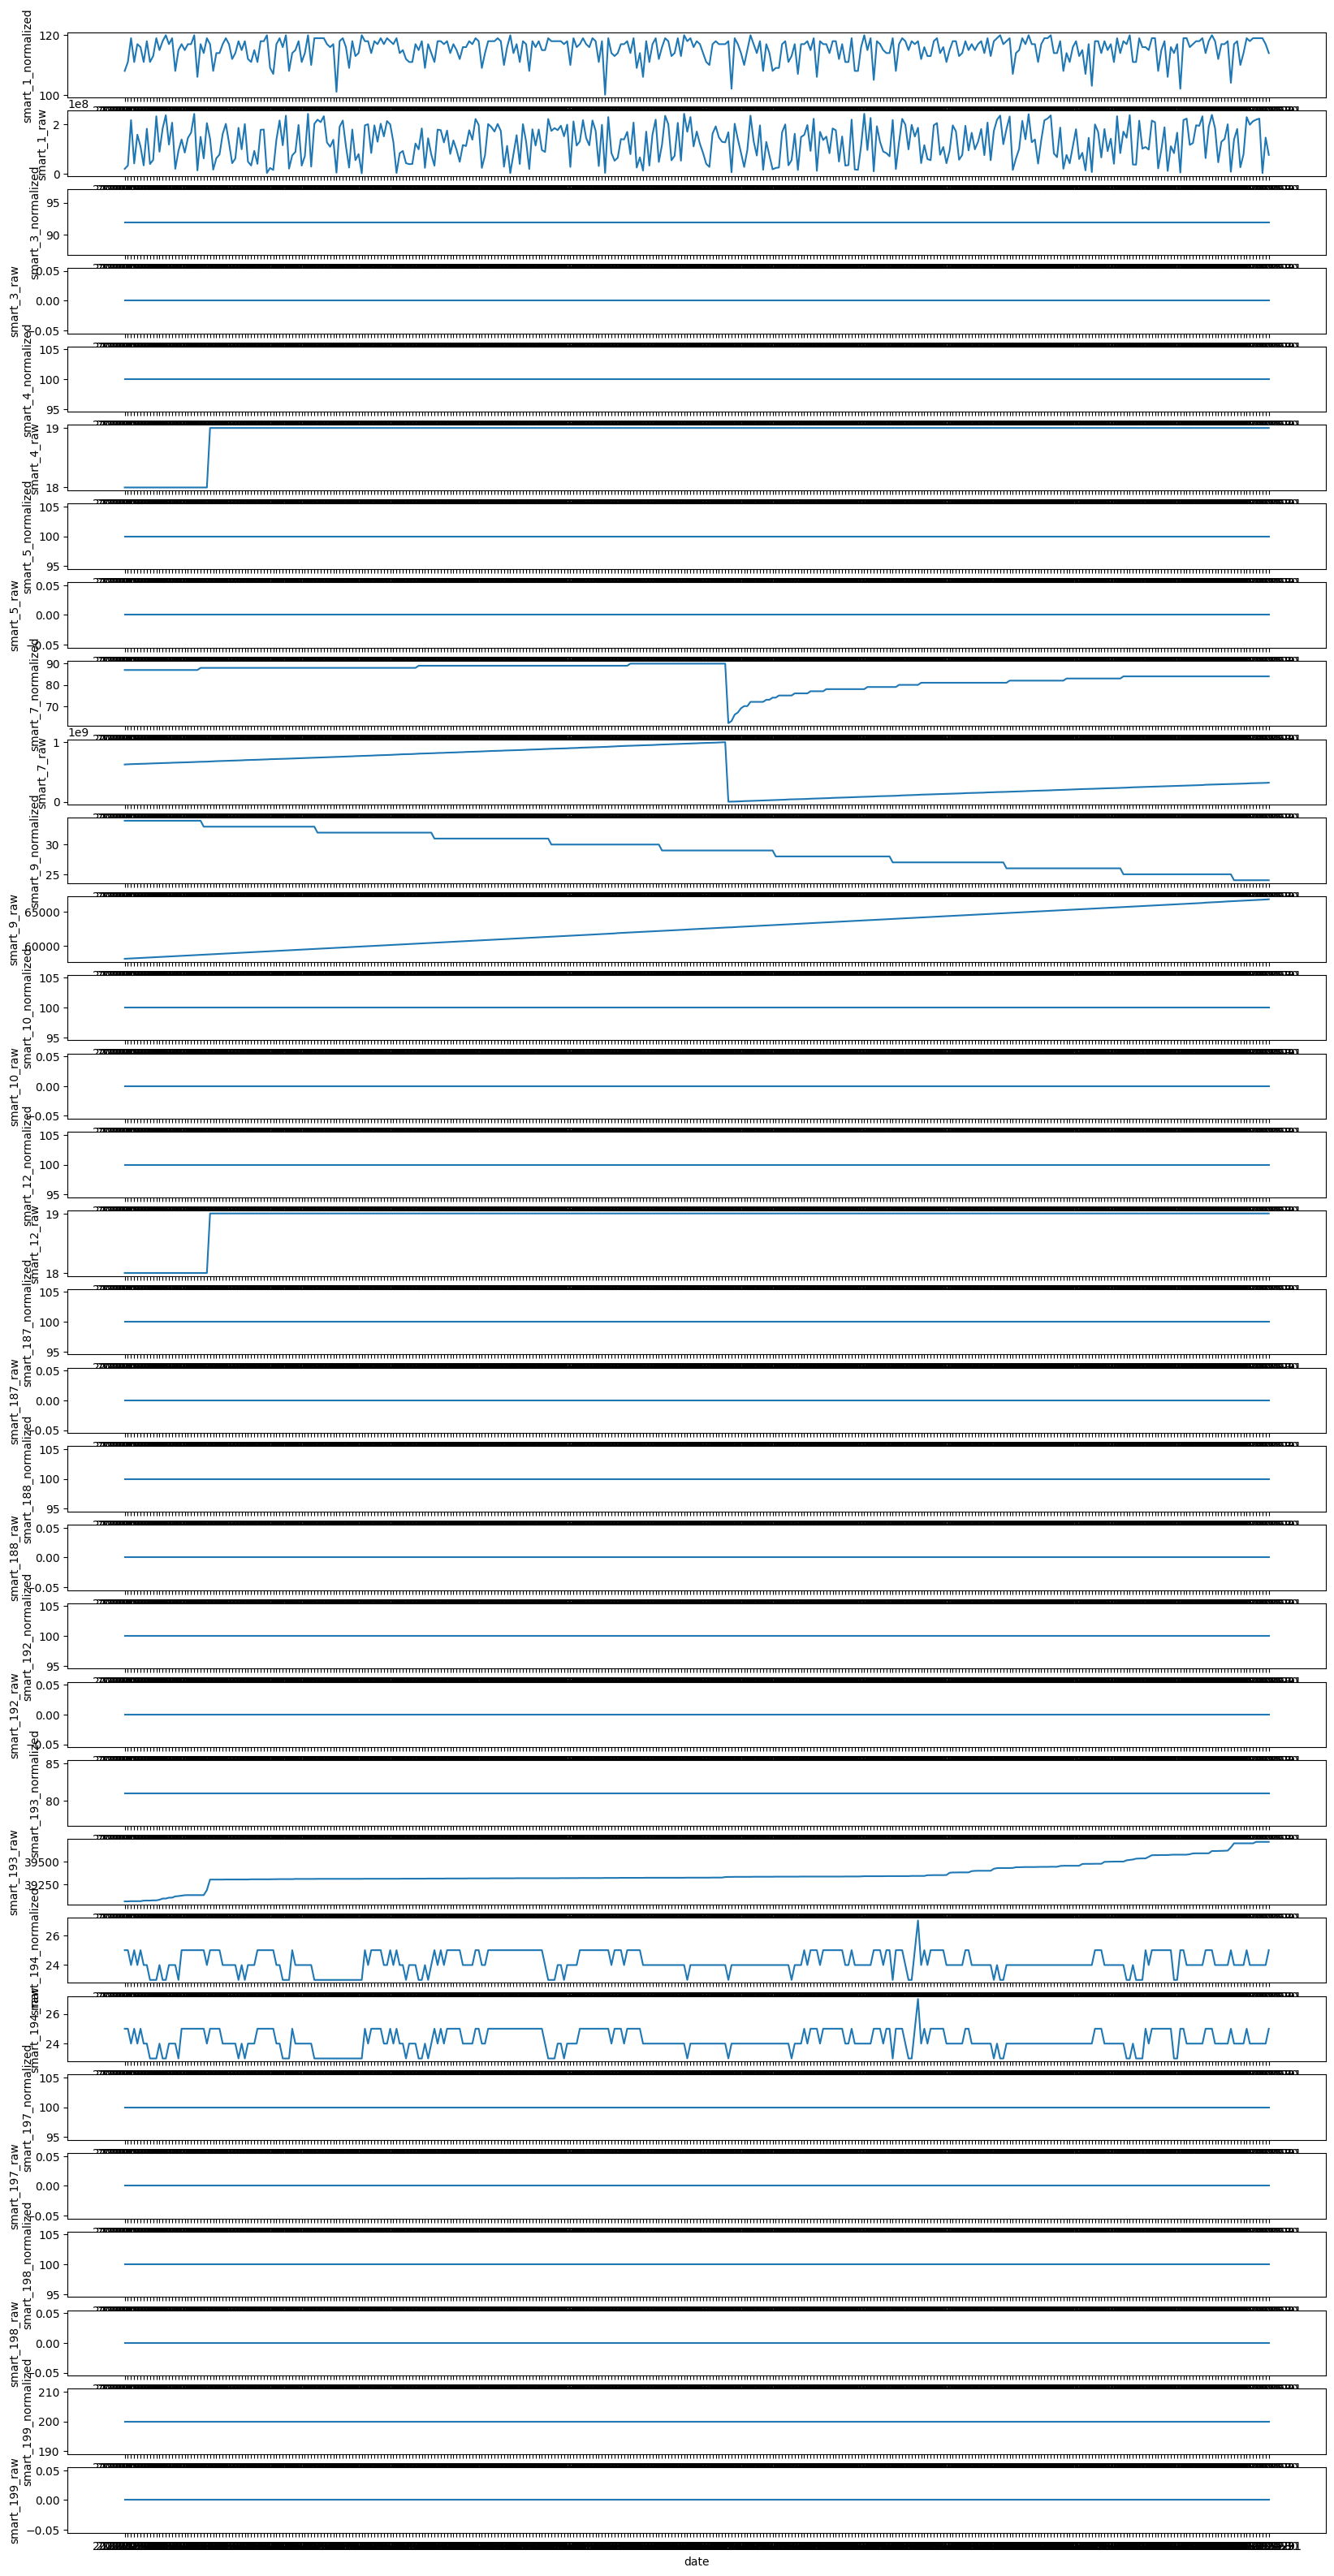

In [37]:
df_S3010M7E = df_selected.filter(pl.col("serial_number")=="S3010M7E")
df_sorted4 = df_S3010M7E.sort(by='date')


#smart statistics for hard drive with serial number S3010LL5

fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted4, x='date', y=df_sorted4.columns[i+5], ax=ax[i])

plt.savefig("./images/S3010M7E.png")

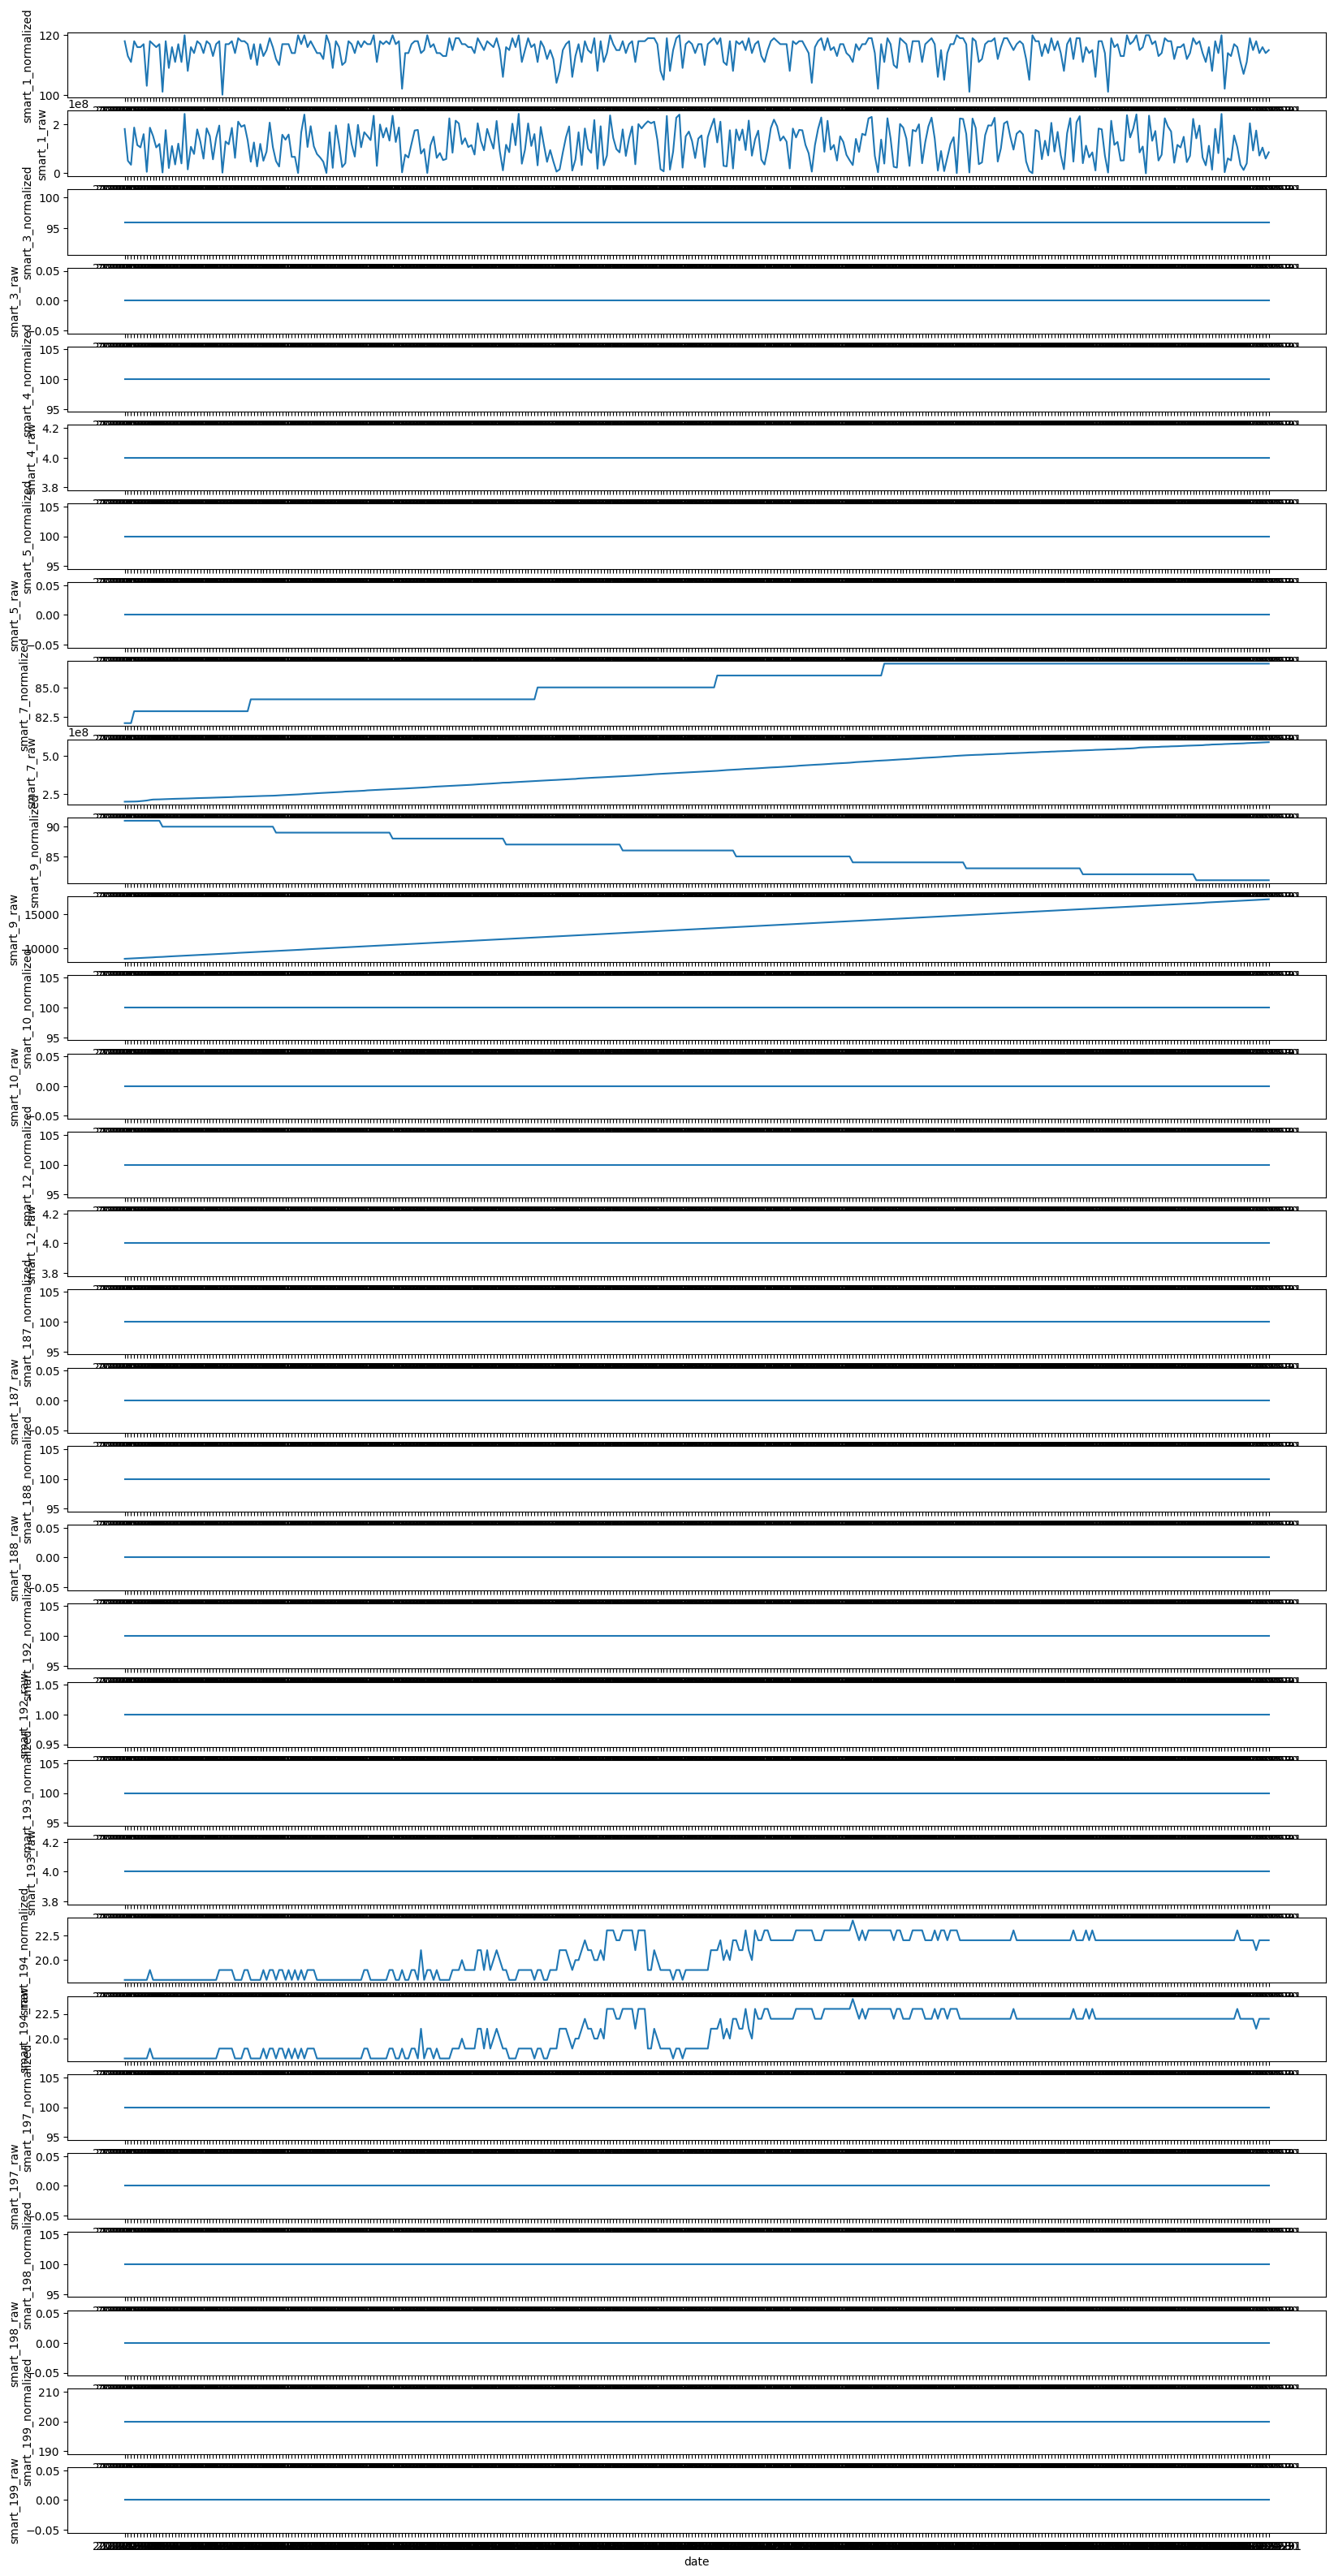

In [38]:
df_Z304A3PD = df_selected.filter(pl.col("serial_number")=="Z304A3PD")
df_sorted5 = df_Z304A3PD.sort(by='date')


#smart statistics for hard drive with serial number S3010LL5

fig, ax = plt.subplots(32, figsize=(20,40))
for i in range(32):
    graph1 = sns.lineplot(data=df_sorted5, x='date', y=df_sorted5.columns[i+5], ax=ax[i])

plt.savefig("./images/Z304A3PD.png")

* drop normalized values
* base model (from backblaze): 
    if smart 5 > 0 OR smart 187 > 0 OR smart 188 > 0 OR smart 197 > 0 OR smart 198 >0:
        hard drive fails
    else: not failing

fail_pred = 0
counter = 0
first_row = 0
values_last_row
for row in df:
    save values for smart statistics for change calculation
    if not first_row == 0:
        change = current_values - valuest_last_row
        if change > threshold_change:
            counter += 1
    if counter > threshold_number_ofsmart:
    

        


In [18]:
def basemodel(df, threshold):
    df = df.to_pandas()
    fail_pred = []
    for index, row in df.iterrows():
        counter = 0
        if row["smart_5_raw"] > 0:
            counter +=1
        if row["smart_187_raw"] > 0:
            counter +=1
        if row["smart_188_raw"] > 0:
            counter +=1
        if row["smart_197_raw"] > 0:
            counter +=1           
        if row["smart_198_raw"] > 0:
            counter +=1
        if counter >= threshold:
            fail_pred.append(1)
        else:
            fail_pred.append(0)
    return fail_pred

test basemodel S3010LL5

In [20]:
y_pred_S3010LL5_t2 = basemodel(df_sorted2, 2)

In [21]:
y_pred_S3010LL5_t2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
y_pred_S3010LL5_t3 = basemodel(df_sorted2, 3)

In [23]:
y_pred_S3010LL5_t3

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [24]:
y_pred_S3010LL5_t4 = basemodel(df_sorted2, 4)
y_pred_S3010LL5_t4

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
y_pred_S3010LL5_t2

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

test basemodel ZJV3BYAY

In [26]:
y_pred_ZJV3BYAY_t2 = basemodel(df_sorted1, 2)
y_pred_ZJV3BYAY_t2


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [27]:
y_pred_ZJV3BYAY_t3 = basemodel(df_sorted1, 3)
y_pred_ZJV3BYAY_t3


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
df_sorted1.head(10)

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-01-01""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,78,60399200,89,0,100,19,100,2832,89,814544278,78,20025,100,0,100,19,97,3,100,0,100,266,100,1521,33,33,100,0,100,0,200,0
"""2022-01-02""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,83,198487720,89,0,100,19,100,2832,89,817290353,78,20040,100,0,100,19,97,3,100,0,100,266,100,1522,32,32,100,0,100,0,200,0
"""2022-01-03""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,75,31407792,89,0,100,19,100,2832,89,821810398,78,20072,100,0,100,19,97,3,100,0,100,266,100,1523,32,32,100,0,100,0,200,0
"""2022-01-04""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,73,20187800,89,0,100,19,100,2848,89,823615483,78,20087,100,0,100,19,96,4,100,0,100,266,100,1524,34,34,100,0,100,0,200,0
"""2022-01-05""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,81,129916256,89,0,100,19,100,2920,89,826413578,78,20119,100,0,100,19,96,4,100,0,100,267,100,1525,32,32,100,0,100,0,200,0
"""2022-01-06""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,69,7366272,89,0,100,19,100,2960,89,827704847,78,20134,100,0,100,19,96,4,100,0,100,267,100,1526,31,31,100,0,100,0,200,0
"""2022-01-07""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,83,218565896,89,0,100,19,100,3144,89,831543630,77,20166,100,0,100,19,96,4,100,0,100,267,100,1527,34,34,100,0,100,0,200,0
"""2022-01-08""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,81,137463872,89,0,100,19,100,3144,89,834212624,77,20182,100,0,100,19,96,4,100,0,100,267,100,1528,33,33,100,0,100,0,200,0
"""2022-01-09""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,83,223506384,89,0,100,19,100,3248,89,838731794,77,20213,100,0,100,19,96,4,100,0,100,267,100,1529,32,32,100,0,100,0,200,0


In [29]:
df_sorted1.tail(10)

date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_12_normalized,smart_12_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_192_normalized,smart_192_raw,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""2022-03-02""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,80,102922176,89,0,100,19,90,39944,74,23680792,76,21457,100,0,100,19,25,75,100,0,100,285,100,1581,34,34,100,0,100,0,200,0
"""2022-03-03""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,82,172754816,89,0,100,19,86,57160,75,28699941,76,21488,100,0,100,19,1,111,100,0,100,286,100,1582,32,32,100,0,100,0,200,0
"""2022-03-04""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,82,152158616,89,0,100,19,86,57984,75,33398323,76,21504,100,0,100,19,1,111,100,0,100,287,100,1583,33,33,100,0,100,0,200,0
"""2022-03-05""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,84,239013112,89,0,100,19,84,64096,76,38504258,76,21535,100,0,100,19,1,122,100,0,100,287,100,1584,34,34,100,0,100,0,200,0
"""2022-03-06""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,80,98975472,89,0,100,19,84,64776,77,46167137,76,21567,100,0,100,19,1,122,100,0,100,287,100,1586,35,35,100,0,100,0,200,0
"""2022-03-07""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,78,62035816,89,0,100,19,84,544,77,48786980,76,21582,100,0,100,19,1,125,100,0,100,287,100,1586,35,35,100,0,100,0,200,0
"""2022-03-08""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,84,243089632,89,0,100,19,83,2040,77,51374487,76,21598,100,0,100,19,1,128,100,0,100,287,100,1587,35,35,100,0,100,0,200,0
"""2022-03-09""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,82,154423768,89,0,100,19,78,22056,78,56443771,76,21629,100,0,100,19,1,182,100,0,100,287,100,1588,35,35,100,0,100,0,200,0
"""2022-03-10""","""ZJV3BYAY""","""ST12000NM0007""",12000138625024,0,79,74834688,89,0,100,19,76,29608,78,62058428,76,21660,100,0,100,19,1,203,100,0,100,288,100,1590,33,33,100,0,100,0,200,0


In [31]:
df_st4000 = df_selected.filter((pl.col("model") == "ST4000DM000"))

In [32]:
st400_dict = fe.create_faildate_dict(df_st4000)

In [33]:
df_st4000 = fe.create_faildate(df_st4000, st400_dict)

In [34]:
df_st4000 = fe.create_target_classification(df_st4000)



In [35]:
df_st4000.write_parquet("./data/2022_data_ST4000DM000.parquet")

basemodel2:
 logistic regression of smart_5_raw, smart_187_raw, smart_188_raw, smart_198_raw, smart_198_raw with failing_in14days as target